In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,D
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,D
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,C
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,B
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,C


In [3]:
mainData.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Linear Regression: 
## what affects G3 (Final Grade)

Intercept of Regression 	: b =  [9.50133799]
Coefficients of Regression 	: a =  [[ 0.17096279  0.27142683 -0.08474233]]

  Predictors  Coefficients
0     famrel      0.170963
1  studytime      0.271427
2     health     -0.084742



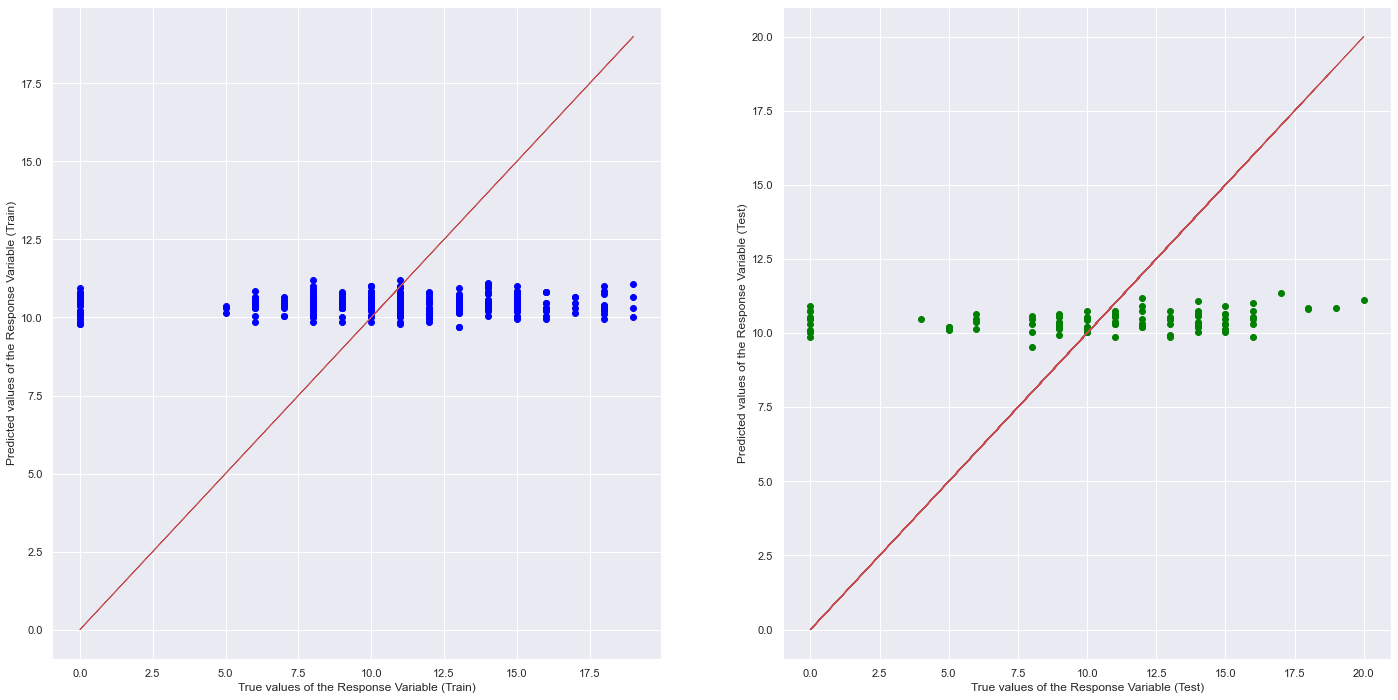

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.004430922634180323
Mean Squared Error (MSE) 	: 19.86600961381199

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.03045868601992552
Mean Squared Error (MSE) 	: 23.143359715426424



In [4]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
response= ["G3"]
predictors = ["famrel","studytime","health"]

y = pd.DataFrame(mainData[response])
X = pd.DataFrame(mainData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Decision Tree
## What affects G3

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4831081081081081

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.30303030303030304



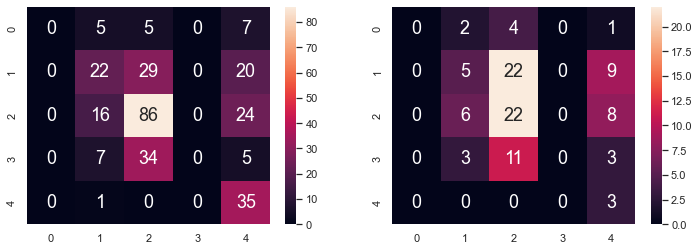

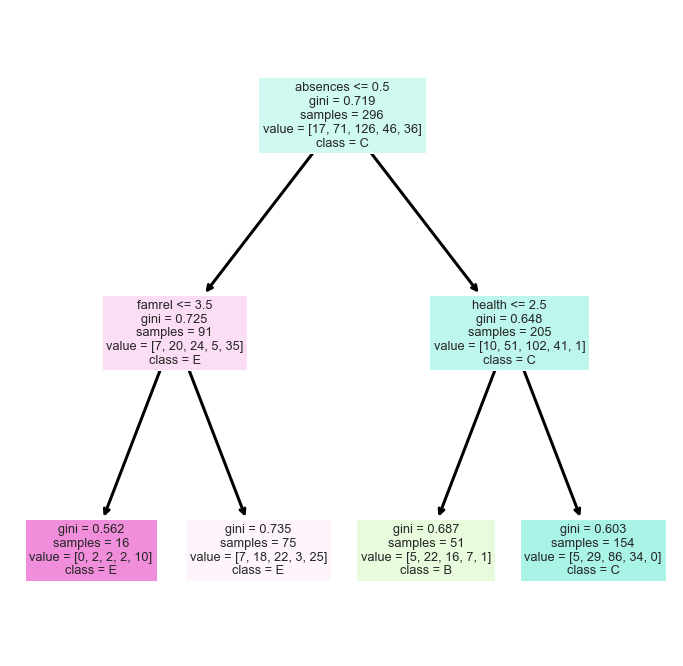

In [5]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

response= ["grades"]
predictors = ["famrel","studytime","health","absences"]


# Extract Response and Predictors
y = pd.DataFrame(mainData[response])
X = pd.DataFrame(mainData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

## Prediction using a Classification Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5101351351351351

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.40404040404040403



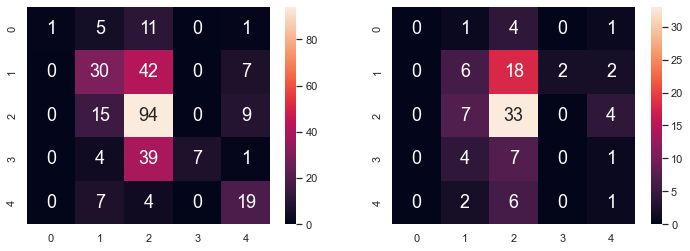

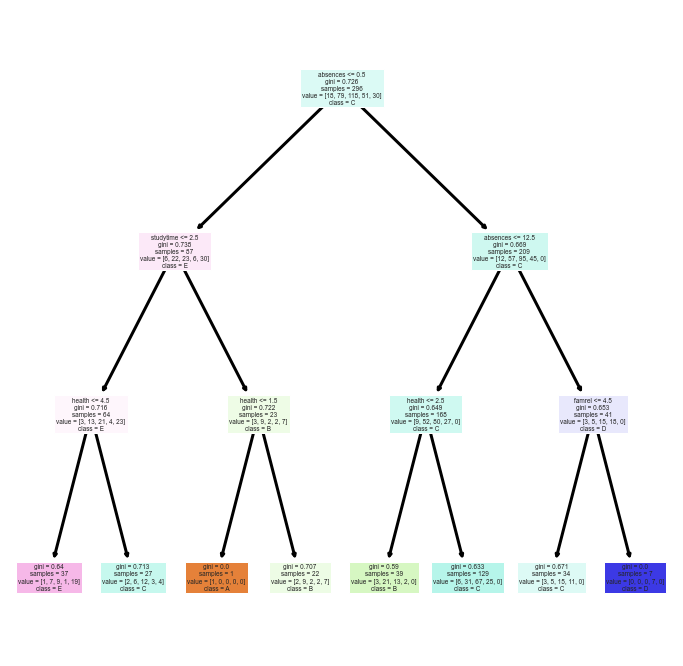

In [6]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
response= ["grades"]
predictors = ["famrel","studytime","health","absences"]

y = pd.DataFrame(mainData[response])
X = pd.DataFrame(mainData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [7]:
# Extract Pokemons for Prediction
mainData_pred = mainData[mainData["id"].isin([1,2,3,4,5,6,7,8,9,10])]
mainData_pred

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,D
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,D
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,C
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,B
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,C
5,6,GP,M,16,U,LE3,T,4,3,services,...,4,2,1,2,5,10,15,15,15,B
6,7,GP,M,16,U,LE3,T,2,2,other,...,4,4,1,1,3,0,12,12,11,C
7,8,GP,F,17,U,GT3,A,4,4,other,...,1,4,1,1,1,6,6,5,6,D
8,9,GP,M,15,U,LE3,A,3,2,services,...,2,2,1,1,1,0,16,18,19,A
9,10,GP,M,15,U,GT3,T,3,4,other,...,5,1,1,1,5,0,14,15,15,B


In [8]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(mainData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['C', 'C', 'C', 'C', 'C', 'C', 'E', 'B', 'E', 'C'], dtype=object)

In [9]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["predGrades"], index = mainData_pred.index)
pkmndata_acc = pd.concat([mainData_pred[["id", "grades"]], y_pred], axis = 1)

pkmndata_acc

,id,grades,predGrades
0,1,D,C
1,2,D,C
2,3,C,C
3,4,B,C
4,5,C,C
5,6,B,C
6,7,C,E
7,8,D,B
8,9,A,E
9,10,B,C


# Random Forest Regression

In [10]:
mainData = pd.read_csv('processedmath.csv')
#X=mainData.drop(['G1','G2','G3_Grade','grades','school','sex','age'],axis = 1)
predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]
X = pd.DataFrame(mainData[predictors]) 
y = mainData['G3']
X.shape


(395, 11)

In [11]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(316, 11) (79, 11) (316,) (79,)


In [12]:
#Random Forest Model (import)
from sklearn.ensemble import RandomForestRegressor

#Instantiation of the model
model = RandomForestRegressor(n_estimators = 20, random_state = 20)

In [13]:
#Fitting model
G3_rf = model.fit(X_train,y_train)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [15]:
print('The training r_sq is:  %.2f'% G3_rf.score(X_train,y_train))

The training r_sq is:  0.87


In [16]:
ytrain_pred=G3_rf.predict(X_train)

In [17]:
print('THE MAE is %.2f'% mean_absolute_error(y_train, ytrain_pred))
print('THE MSE is %.2f'% mean_squared_error(y_train, ytrain_pred))
print('THE RMSE is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('THE EVS is %.2f'% explained_variance_score(y_train, ytrain_pred))


THE MAE is 1.28
THE MSE is 2.82
THE RMSE is 1.68
THE EVS is 0.87


In [18]:
y_test_pred=G3_rf.predict(X_test)

In [19]:
print(y_test_pred[:10])
print('THE r_sq is %.2f'% r2_score(y_train, ytrain_pred))

[11.4  14.7   9.95  4.15 10.5  11.45  3.9  11.    4.35  9.05]
THE r_sq is 0.87


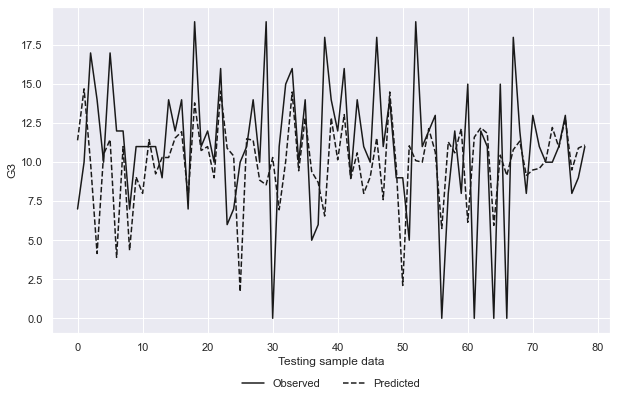

In [20]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))

plt.plot(x_ax,y_test,label='Observed',color ='k',linestyle ='-')
plt.plot(x_ax,y_test_pred,label='Predicted',color ='k',linestyle ='--')
plt.ylabel('G3')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2), loc = 'lower center',ncol= 2, frameon = False)
plt.show()

In [22]:
#Plot prediction errors
from yellowbrick.regressor import PredictionError